<a href="https://colab.research.google.com/github/spurthip28-bit/Supervised-Learning/blob/main/Bank_Personal_Loan_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BANK PERSONAL LOAN MODELING**

***Objective***

 Classify customers if they will accept a personal loan offer based on their dempgraphics and financial health

***Data Preprocessing***

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import dataset
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv",on_bad_lines="skip")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
#Format column names to lower case
df.columns = [x.lower() for x in df.columns]
df.columns


Index(['id', 'age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

In [6]:
#Rename column name
df.rename(columns={"zip code":"zip_code","securities account":"securities_account","cd account":"cd_account","personal loan":"personal_loan"},inplace=True)

In [7]:
#total number of unique zip codes
df['zip_code'].nunique()

467

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We observe that most of the columns are integers. To avoid confusion

*   Convert id,zip_Code,education to object datatype
*   Convert cd_account ,personal_loan,securities_account,online,creditCard to boolean datatype



In [9]:
#Change data types
df['id']=df['id'].astype(str)
df['zip_code']=df['zip_code'].astype(str)
df['education']=df['education'].astype(str)
df['cd_account']=df['cd_account'].astype(str)
df['personal_loan']=df['personal_loan'].astype(str)
df['creditcard']=df['creditcard'].astype(str)
df['online']=df['online'].astype(str)
df['securities_account']=df['securities_account'].astype(str)

In [10]:
df.describe()

,age,experience,income,family,ccavg,mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


In [11]:
# Create income bins
income_bins = [0, 50, 100, 150, 200, df['income'].max()]
income_labels = ['0-50', '50-100', '100-150', '150-200', '200+']
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, df['age'].max()]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59','60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [12]:
df.dtypes

,0
id,object
age,int64
experience,int64
income,int64
zip_code,object
family,int64
ccavg,float64
education,object
mortgage,int64
personal_loan,object


***EDA (Exploratory Data Analysis)***

**What are we trying to answer?**

*Uni- variate Analysis*

*   Age distribution
*   Annual Income distribution
*   Education Level

*Bi- variate Analysis*

*   Mortgage Vs Personal Loan
*   ccavg Vs Personal Loan
*   Securities account,cd account,personal loan
*   zip code vs personal loan








**Uni-variate Analysis**

<Axes: xlabel='age_group'>

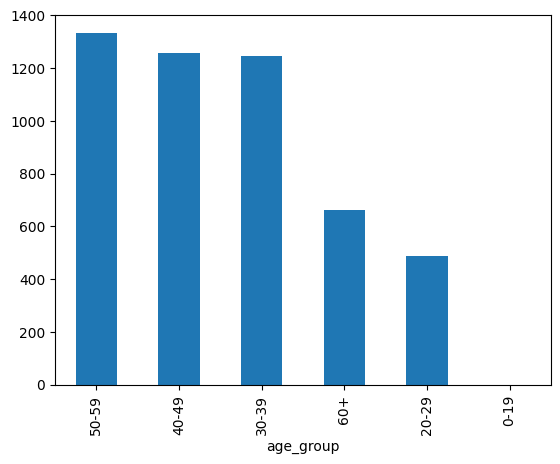

In [13]:
#Age distribution
df['age_group'].value_counts().plot(kind='bar')

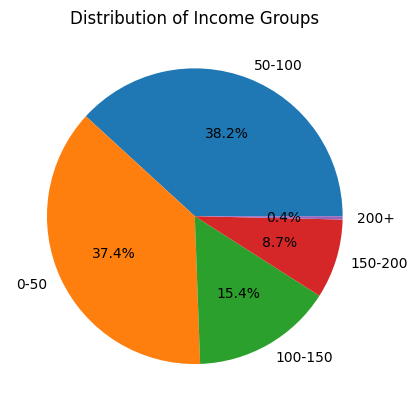

In [14]:
#Income distribution pie chart with percentages
df['income_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Income Groups')
plt.ylabel('') # Remove default ylabel
plt.show()

<Axes: xlabel='income'>

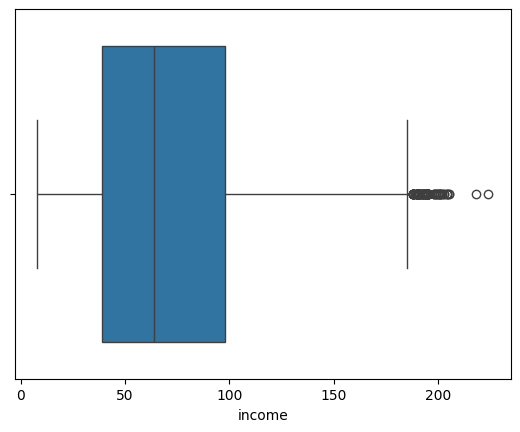

In [15]:
sns.boxplot(data=df,x="income")

<Axes: xlabel='income', ylabel='Percent'>

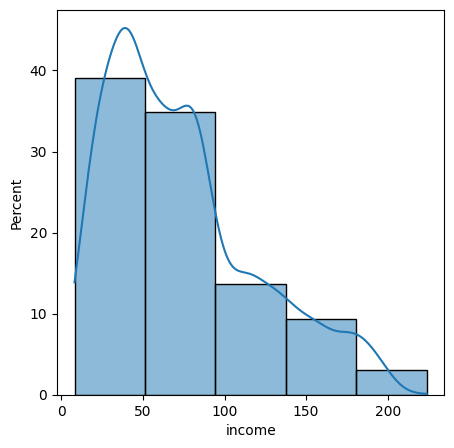

In [16]:
#Income Distribution
plt.figure(figsize=(5,5))
sns.histplot(data=df,x="income",bins=5,stat="percent",kde=True)


<Axes: xlabel='education', ylabel='count'>

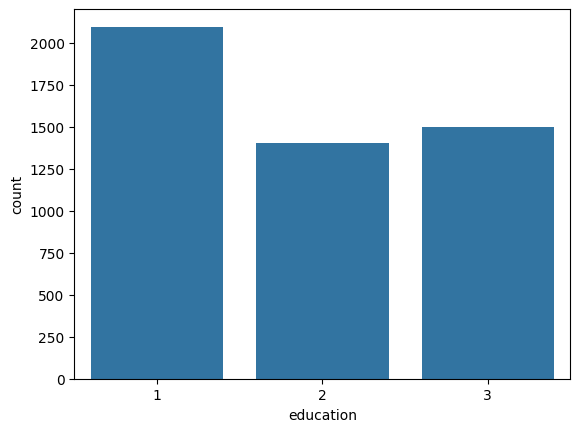

In [17]:
sns.countplot(data=df,x="education")

<Axes: xlabel='percent', ylabel='personal_loan'>

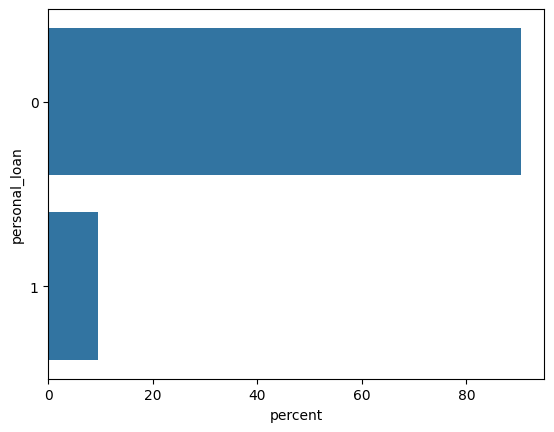

In [18]:
#Target variable distribution plot
sns.countplot(df['personal_loan'],stat="percent")

*   Majority of the customers in the datset are between the age group 30-60
*  Around 75% of the population earn less than 100K per year
*   The education level is not varied based on the data
*  The target variable personal_loan is highly imbalanced



**Bi- Variate Analysis**

In [19]:
#Average Mortgage value of customers who accepted personal loan in last campaign
x=df.groupby(["personal_loan"])["mortgage"].mean()

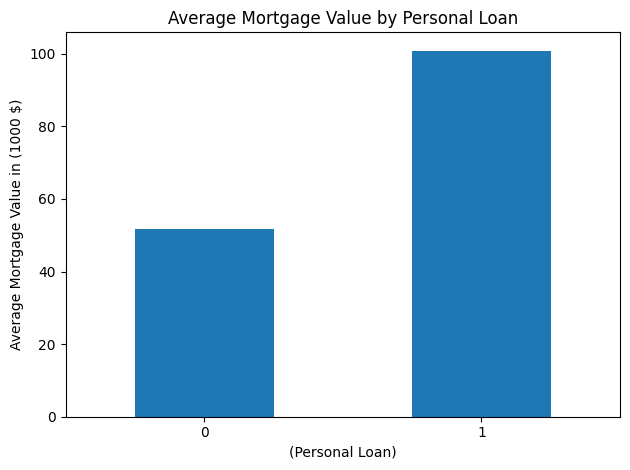

In [20]:
# Plot the average mortgage value by personal loan and creditcard
x.plot(kind='bar')
plt.title('Average Mortgage Value by Personal Loan')
plt.xlabel('(Personal Loan)')
plt.ylabel('Average Mortgage Value in (1000 $)')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [21]:
#Average Income of customers who accepted personal loan in last campaign
x=df.groupby(["personal_loan"])["income"].mean()

Text(0, 0.5, 'Average Income')

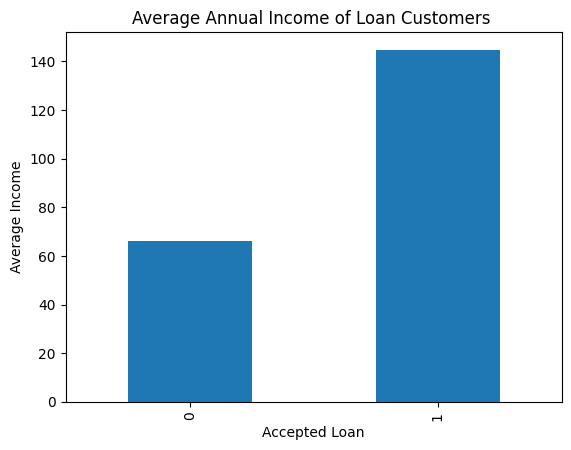

In [22]:
x.plot(kind="bar")
plt.title("Average Annual Income of Loan Customers ")
plt.xlabel("Accepted Loan")
plt.ylabel("Average Income")

<Axes: xlabel='age_group', ylabel='count'>

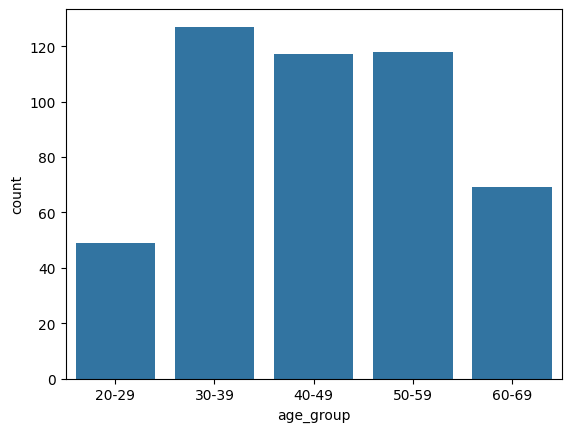

In [23]:
#Loan acceptors by age group
age_bins = range(20, 71, 10)
age_labels=[f'{i}-{i+9}' for i in age_bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
loan_accepters=df[df["personal_loan"]=='1']
loan_accepters['age_group'].value_counts().sort_values(ascending=False)
sns.countplot(data=loan_accepters,x="age_group")

/tmp/ipython-input-3918027835.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = loan_accepters.groupby('age_group')['mortgage'].mean().reset_index()


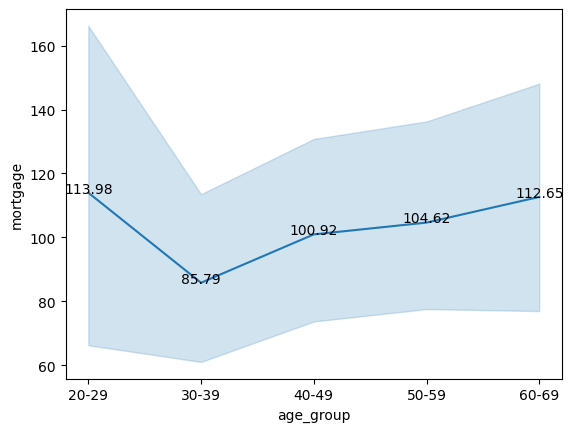

In [24]:
ax = sns.lineplot(data=loan_accepters,x="age_group",y="mortgage")

# Get the data for the plot
plot_data = loan_accepters.groupby('age_group')['mortgage'].mean().reset_index()

# Add labels to the points
for i, row in plot_data.iterrows():
    ax.text(row['age_group'], row['mortgage'], round(row['mortgage'], 2), color='black', ha="center")

plt.show()

In [25]:
#Family count vs loan acceptance
family_loan_counts = df.groupby(['personal_loan', 'family']).size().unstack(fill_value=0)

print("Counts of family sizes for Personal Loan = 0 (No Loan)")
print(family_loan_counts.loc['0'])

print("\nCounts of family sizes for Personal Loan = 1 (Loan Accepted)")
print(family_loan_counts.loc['1'])

Counts of family sizes for Personal Loan = 0 (No Loan)
family
1    1365
2    1190
3     877
4    1088
Name: 0, dtype: int64

Counts of family sizes for Personal Loan = 1 (Loan Accepted)
family
1    107
2    106
3    133
4    134
Name: 1, dtype: int64


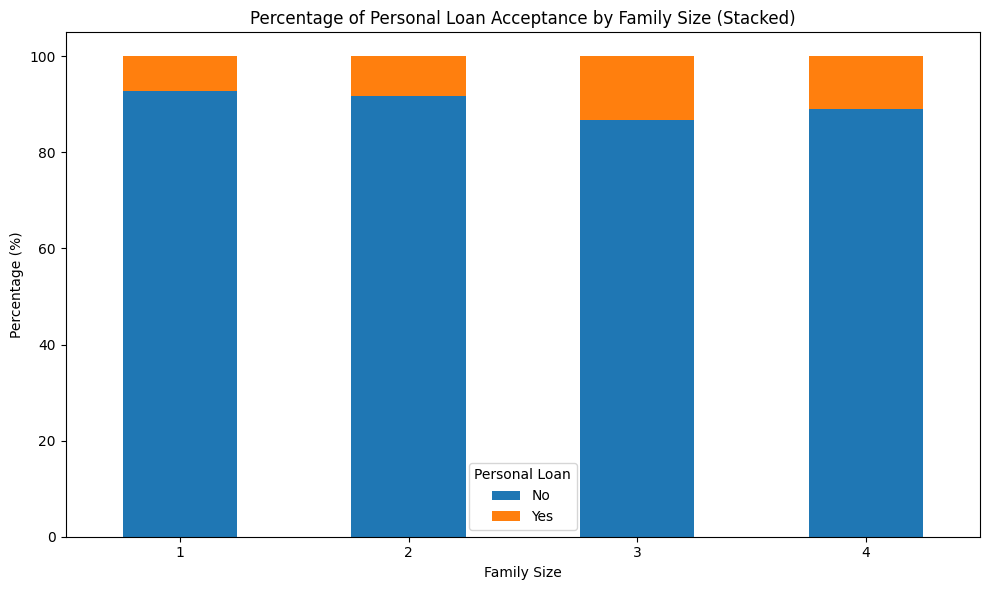

In [26]:
family_loan_percentages_by_family = family_loan_counts.apply(lambda x: x / x.sum(), axis=0) * 100

family_loan_percentages_by_family.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Personal Loan Acceptance by Family Size (Stacked)')
plt.xlabel('Family Size')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='creditcard'>

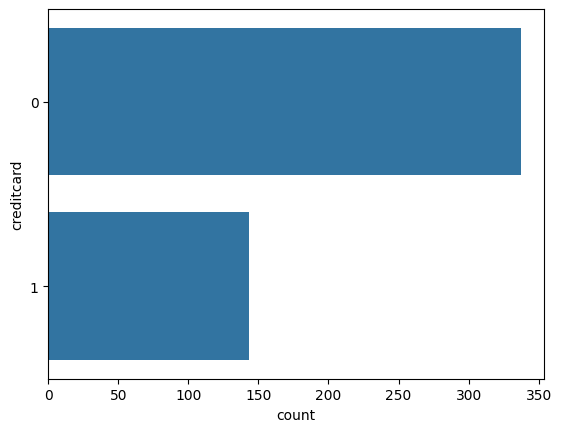

In [27]:
#
sns.countplot(data=loan_accepters,y='creditcard')

<Axes: xlabel='percent', ylabel='education'>

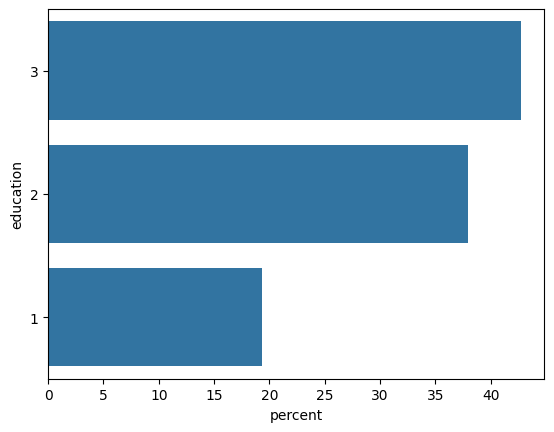

In [28]:
sns.countplot(data=loan_accepters,y="education",stat="percent")

<Axes: xlabel='income', ylabel='Percent'>

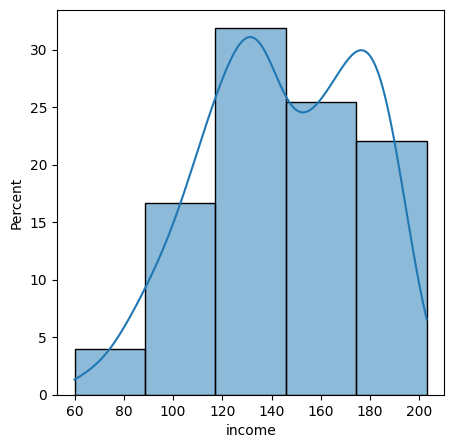

In [29]:


plt.figure(figsize=(5,5))
sns.histplot(data=loan_accepters,x="income",bins=5,stat="percent",kde=True)


*  The average mortgage loan is almost double for the people who accepted the personal loan offer
*   The average income of loan acceptors is more than double the average income of non-loan acceptors
*   Majority of customers who accepted the loan offer are between the age group 30-60
*   Customers of age group 30-39 might be the potential loan acceptors as they have love average mortgage
*   The acceptance rate of personal loan offer is higher in familys with 3 and 4 members
*  The acceptance rate of personal loan is double for people without credit cards








**Feature Engineering/Feature Selection**

In [30]:
df.drop(columns=['zip_code','id'],inplace=True)

In [31]:
num_cols= df.select_dtypes(include=np.number)
cat_cols= df.select_dtypes(exclude=np.number)

In [32]:
df['age_group'].dtype

CategoricalDtype(categories=['20-29', '30-39', '40-49', '50-59', '60-69'], ordered=True, categories_dtype=object)

In [33]:
cat_cols

,education,personal_loan,securities_account,cd_account,online,creditcard,income_group,age_group
0,1,0,1,0,0,0,0-50,20-29
1,1,0,1,0,0,0,0-50,40-49
2,1,0,0,0,0,0,0-50,30-39
3,2,0,0,0,0,0,100-150,30-39
4,2,0,0,0,0,1,0-50,30-39
...,...,...,...,...,...,...,...,...
4995,3,0,0,0,1,0,0-50,20-29
4996,1,0,0,0,1,0,0-50,30-39
4997,3,0,0,0,0,0,0-50,60-69
4998,2,0,0,0,1,0,0-50,60-69


**One hot encoding**

In [34]:
from sklearn.preprocessing import OneHotEncoder
df_dummy = pd.get_dummies(df, columns=cat_cols.drop(columns=['age_group']).columns, drop_first=True)
encoder=OneHotEncoder(sparse_output=False)
df_encoded=encoder.fit_transform(df_dummy[cat_cols.drop(columns=['age_group'])])
one_hot_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(df_dummy[cat_cols.drop(columns=['age_group'])].columns))
df_sklearn_encoded = pd.concat([df.drop(cat_cols,axis=1),one_hot_df],axis=1)

In [35]:
df_sklearn_encoded

,age,experience,income,family,ccavg,mortgage,age_nan,experience_nan,income_nan,family_nan,...,education_3_nan,personal_loan_1_nan,securities_account_1_nan,cd_account_1_nan,online_1_nan,creditcard_1_nan,income_group_50-100_nan,income_group_100-150_nan,income_group_150-200_nan,income_group_200+_nan
0,25,1,49,4,1.6,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,45,19,34,3,1.5,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,39,15,11,1,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,35,9,100,1,2.7,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,35,8,45,4,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4996,30,4,15,4,0.4,85,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4997,63,39,24,2,0.3,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4998,65,40,49,3,0.5,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
